### Web Scraping

Finding Common Users

In [1]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict

In [2]:
def get_users_from_reviews(url):
    """Fetch users from the review page and return a list of usernames."""
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
    }
    
    response = requests.get(url, headers=headers)
    
    # Debug: Print the response status code
    print(f"Response status from {url}: {response.status_code}")
    
    # If the request was successful, parse the content
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all review elements (update the selector to match the provided HTML structure)
        review_elements = soup.select('a[data-testid="author-link"]')  # Corrected selector
        
        # Extract usernames
        users = [user.get_text(strip=True) for user in review_elements]
        
        # Debug: Print users found on the current page
        print(f"Users from {url}: {users}")
        
        return users
    else:
        print(f"Failed to retrieve users from {url}")
        return []

In [3]:
def find_common_users(urls):
    """Find users that appear in at least three review pages and their corresponding URLs."""
    user_urls = defaultdict(list)  # Dictionary to store users and their corresponding URLs
    
    # Gather users from each URL
    for url in urls:
        users = get_users_from_reviews(url)
        for user in users:
            user_urls[user].append(url)
    
    # Filter users that appear in at least three different URLs
    common_users = {user: urls for user, urls in user_urls.items() if len(urls) >= 3}
    
    return common_users

In [4]:
# List of URLs
urls = [
    'https://www.imdb.com/title/tt4154796/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt3315342/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt1431045/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt10872600/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt9362722/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt4154756/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt4633694/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt0145487/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt0371746/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt0800080/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt2015381/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt0848228/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt6791350/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt1877832/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt2245084/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt6016776/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt1270798/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt1843866/reviews/?ref_=tt_ov_ql_2',
    'https://www.imdb.com/title/tt5463162/reviews/?ref_=tt_ov_ql_2',
]

common_users = find_common_users(urls)

# Print the common users and their corresponding links
for user, user_urls in common_users.items():
    print(f"User: {user}, Appears in URLs: {user_urls}")

Response status from https://www.imdb.com/title/tt4154796/reviews/?ref_=tt_ov_ql_2: 200
Users from https://www.imdb.com/title/tt4154796/reviews/?ref_=tt_ov_ql_2: ['MoistMovies', 'nickgray-12862', 'vert2712', 'davyjones-636363', 'ritchiep-56574', 'eandros-77451', 'dhiraj-yahoo', 'larshoeijmans', 'miniminnie-23063', 'theroo200182', 'ahmetkozan', 'CriticalThinking2', 'michelle-ladycanuck-dick', 'rjcattermole', 'jaacy-84600', 'monks_89', 'dummykenmen', 'ymyuseda', 'eduberti33', 'Mardolin', 'hypercube001', 'tp-cherry12', 'Random789', 'james-84287']
Response status from https://www.imdb.com/title/tt3315342/reviews/?ref_=tt_ov_ql_2: 200
Users from https://www.imdb.com/title/tt3315342/reviews/?ref_=tt_ov_ql_2: ['mbhgkmsgg', 'Tweekums', 'vithiet', 'artgutierrez', '0U', 'TheJediWay9', 'badmanlykme', 'trublu215', 'ACollegeStudent', 'ahmetkozan', 'Her-Excellency', 'gettodamoofies', 'jherrick-6-991336', 'NpMoviez', 'shawneofthedead', 'UMWolvie2442', 'jcardella1', 'alouibelhassen', 'Leofwine_draca',

Finding Similar links

In [5]:
from collections import defaultdict

In [6]:
# Simulating the provided user data
user_data = {
    '0U': ['https://www.imdb.com/title/tt3315342/reviews/?ref_=tt_ov_ql_2',
           'https://www.imdb.com/title/tt4154756/reviews/?ref_=tt_ov_ql_2',
           'https://www.imdb.com/title/tt0371746/reviews/?ref_=tt_ov_ql_2',
           'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ov_ql_2',
           'https://www.imdb.com/title/tt1877832/reviews/?ref_=tt_ov_ql_2',
           'https://www.imdb.com/title/tt1270798/reviews/?ref_=tt_ov_ql_2'],
    
    'Platypuschow': ['https://www.imdb.com/title/tt3315342/reviews/?ref_=tt_ov_ql_2',
                     'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ov_ql_2',
                     'https://www.imdb.com/title/tt5463162/reviews/?ref_=tt_ov_ql_2'],
    
    'planktonrules': ['https://www.imdb.com/title/tt1431045/reviews/?ref_=tt_ov_ql_2',
                     'https://www.imdb.com/title/tt4633694/reviews/?ref_=tt_ov_ql_2',
                     'https://www.imdb.com/title/tt0371746/reviews/?ref_=tt_ov_ql_2',
                     'https://www.imdb.com/title/tt0800080/reviews/?ref_=tt_ov_ql_2',
                     'https://www.imdb.com/title/tt0848228/reviews/?ref_=tt_ov_ql_2',
                     'https://www.imdb.com/title/tt2245084/reviews/?ref_=tt_ov_ql_2'],
    
    'AnnaPagrati': ['https://www.imdb.com/title/tt1431045/reviews/?ref_=tt_ov_ql_2',
                    'https://www.imdb.com/title/tt6016776/reviews/?ref_=tt_ov_ql_2',
                    'https://www.imdb.com/title/tt5463162/reviews/?ref_=tt_ov_ql_2'],
    
    'andreascaloni': ['https://www.imdb.com/title/tt4154756/reviews/?ref_=tt_ov_ql_2',
                      'https://www.imdb.com/title/tt2015381/reviews/?ref_=tt_ov_ql_2',
                      'https://www.imdb.com/title/tt0848228/reviews/?ref_=tt_ov_ql_2'],
    
    'auuwws': ['https://www.imdb.com/title/tt4154756/reviews/?ref_=tt_ov_ql_2',
               'https://www.imdb.com/title/tt2015381/reviews/?ref_=tt_ov_ql_2',
               'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ov_ql_2'],
    
    'Mysterygeneration': ['https://www.imdb.com/title/tt0145487/reviews/?ref_=tt_ov_ql_2',
                         'https://www.imdb.com/title/tt6791350/reviews/?ref_=tt_ov_ql_2',
                         'https://www.imdb.com/title/tt1843866/reviews/?ref_=tt_ov_ql_2'],
    
    'TheLittleSongbird': ['https://www.imdb.com/title/tt0371746/reviews/?ref_=tt_ov_ql_2',
                          'https://www.imdb.com/title/tt0848228/reviews/?ref_=tt_ov_ql_2',
                          'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ov_ql_2',
                          'https://www.imdb.com/title/tt1877832/reviews/?ref_=tt_ov_ql_2',
                          'https://www.imdb.com/title/tt2245084/reviews/?ref_=tt_ov_ql_2',
                          'https://www.imdb.com/title/tt1843866/reviews/?ref_=tt_ov_ql_2'],
    
    'CalRhys': ['https://www.imdb.com/title/tt2015381/reviews/?ref_=tt_ov_ql_2',
                'https://www.imdb.com/title/tt0848228/reviews/?ref_=tt_ov_ql_2',
                'https://www.imdb.com/title/tt1877832/reviews/?ref_=tt_ov_ql_2'],
    
    'SPZMaxinema': ['https://www.imdb.com/title/tt0848228/reviews/?ref_=tt_ov_ql_2',
                    'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ov_ql_2',
                    'https://www.imdb.com/title/tt1843866/reviews/?ref_=tt_ov_ql_2'],
}

In [7]:
# Function to find users with at least 3 common links
def find_users_with_common_links(user_data):
    user_common_links = defaultdict(set)  # User to set of URLs

    # Iterate through each user's URLs to create a mapping
    for user, urls in user_data.items():
        for url in urls:
            user_common_links[url].add(user)  # Map URL to users

    # Find users who have rated at least 3 common links
    users_with_common_links = defaultdict(list)  # User to list of common URLs
    for url, users in user_common_links.items():
        if len(users) >= 3:  # Check if at least 3 users rated this URL
            for user in users:
                users_with_common_links[user].append(url)

    # Filter users with at least 3 common links
    result_users = {user: links for user, links in users_with_common_links.items() if len(links) >= 3}
    
    return result_users

# Find the users with at least 3 common links
result = find_users_with_common_links(user_data)

In [8]:
# Get the first 5 users from the result
first_five_users = list(result.items())[:5]

# Print the users and their common links
for user, common_links in first_five_users:
    print(f"User: {user}, Common Links: {common_links}")

User: 0U, Common Links: ['https://www.imdb.com/title/tt4154756/reviews/?ref_=tt_ov_ql_2', 'https://www.imdb.com/title/tt0371746/reviews/?ref_=tt_ov_ql_2', 'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ov_ql_2', 'https://www.imdb.com/title/tt1877832/reviews/?ref_=tt_ov_ql_2']
User: andreascaloni, Common Links: ['https://www.imdb.com/title/tt4154756/reviews/?ref_=tt_ov_ql_2', 'https://www.imdb.com/title/tt0848228/reviews/?ref_=tt_ov_ql_2', 'https://www.imdb.com/title/tt2015381/reviews/?ref_=tt_ov_ql_2']
User: auuwws, Common Links: ['https://www.imdb.com/title/tt4154756/reviews/?ref_=tt_ov_ql_2', 'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ov_ql_2', 'https://www.imdb.com/title/tt2015381/reviews/?ref_=tt_ov_ql_2']
User: TheLittleSongbird, Common Links: ['https://www.imdb.com/title/tt0371746/reviews/?ref_=tt_ov_ql_2', 'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ov_ql_2', 'https://www.imdb.com/title/tt1877832/reviews/?ref_=tt_ov_ql_2', 'https://www.imdb.com/tit

Scrap Data

In [9]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict

In [10]:
def scrape_imdb_reviews(user_common_links):
    reviews_data = defaultdict(list)  # To store username, movie title, and rating

    for user, links in user_common_links.items():
        for link in links:
            response = requests.get(link)
            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')
                
                # Find the movie title
                movie_title = soup.find('h2', {'data-testid': 'subtitle'}).text.strip()  # Extracting movie title
                
                # Find user reviews and ratings
                reviews = soup.find_all('div', class_='review-container')
                for review in reviews:
                    # Find the rating span
                    rating_tag = review.find('span', class_='ipc-rating-star--rating')
                    if rating_tag:
                        rating = rating_tag.text.strip()
                    else:
                        rating = ''  # Leave empty if no rating

                    # Append the movie title and rating for the user
                    reviews_data[user].append({'movie': movie_title, 'rating': rating})

    return reviews_data

In [ ]:
user_data = {
    '0U': [
        'https://www.imdb.com/title/tt4154756/reviews/?ref_=tt_ov_ql_2',
        'https://www.imdb.com/title/tt0371746/reviews/?ref_=tt_ov_ql_2',
        'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ov_ql_2',
        'https://www.imdb.com/title/tt1877832/reviews/?ref_=tt_ov_ql_2'
    ],
    'andreascaloni': [
        'https://www.imdb.com/title/tt4154756/reviews/?ref_=tt_ov_ql_2',
        'https://www.imdb.com/title/tt0848228/reviews/?ref_=tt_ov_ql_2',
        'https://www.imdb.com/title/tt2015381/reviews/?ref_=tt_ov_ql_2'
    ],
    'auuwws': [
        'https://www.imdb.com/title/tt4154756/reviews/?ref_=tt_ov_ql_2',
        'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ov_ql_2',
        'https://www.imdb.com/title/tt2015381/reviews/?ref_=tt_ov_ql_2'
    ],
    'TheLittleSongbird': [
        'https://www.imdb.com/title/tt0371746/reviews/?ref_=tt_ov_ql_2',
        'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ov_ql_2',
        'https://www.imdb.com/title/tt1877832/reviews/?ref_=tt_ov_ql_2',
        'https://www.imdb.com/title/tt0848228/reviews/?ref_=tt_ov_ql_2',
        'https://www.imdb.com/title/tt1843866/reviews/?ref_=tt_ov_ql_2'
    ],
    'SPZMaxinema': [
        'https://www.imdb.com/title/tt3501632/reviews/?ref_=tt_ov_ql_2',
        'https://www.imdb.com/title/tt0848228/reviews/?ref_=tt_ov_ql_2',
        'https://www.imdb.com/title/tt1843866/reviews/?ref_=tt_ov_ql_2'
    ]
}

In [12]:
# Scrape data
result_data = scrape_imdb_reviews(user_data)

for review in result_data[user]:
    print(f"User: {user}, Movie: {review['movie']}, Rating: {review['rating']}/10")

Convert to Excel Sheet

In [14]:
import pandas as pd

# Convert results to a DataFrame
df = pd.DataFrame(result_data)

# Write DataFrame to an Excel file
csv_file_path = 'reviews.csv'
df.to_csv(csv_file_path, index=False)

print(f"Data written to {csv_file_path}")

Data written to reviews.csv


### Recommendation System

Read the File

In [17]:
import pandas as pd
import numpy as np

In [25]:
# Read the CSV file into a DataFrame
df = pd.read_csv('reviews.csv')

# Display the first few rows of the DataFrame
df.head()

,Users,Avengers: Infinity War,Iron Man,Thor: Ragnarok,The Avengers,Guardians of the Galaxy
0,0U,10,10.0,10.0,NaN,NaN
1,andreascaloni,8,NaN,NaN,8.0,9.0
2,auuwws,10,NaN,9.0,NaN,8.0
3,TheLittleSongbird,9,9.0,10.0,9.0,NaN
4,SPZMaxinema,9,NaN,9.0,10.0,NaN


In [ ]:
import pandas as pd

# Sample DataFrame creation (replace this with your actual data loading)
data = {
    'Users': ['0U', 'andreascaloni', 'auuwws', 'TheLittleSongbird', 'SPZMaxinema'],
    'Avengers: Infinity War': [10, 8, 10, 9, 9],
    'Iron Man': [10.0, None, None, 9.0, None],
    'Thor: Ragnarok': [10.0, 8.0, 9.0, 10.0, 9.0],
    'The Avengers': [None, 8.0, None, 9.0, 10.0],
    'Guardians of the Galaxy': [None, 9.0, 8.0, None, None]
}

df = pd.DataFrame(data)

# Drop the 'Users' column
df_ratings = df.drop(columns=['Users'])

# Display the DataFrame without the username
print(df_ratings)




   Avengers: Infinity War  Iron Man  Thor: Ragnarok  The Avengers  \
0                      10      10.0            10.0           NaN   
1                       8       NaN             8.0           8.0   
2                      10       NaN             9.0           NaN   
3                       9       9.0            10.0           9.0   
4                       9       NaN             9.0          10.0   

   Guardians of the Galaxy  
0                      NaN  
1                      9.0  
2                      8.0  
3                      NaN  
4                      NaN  


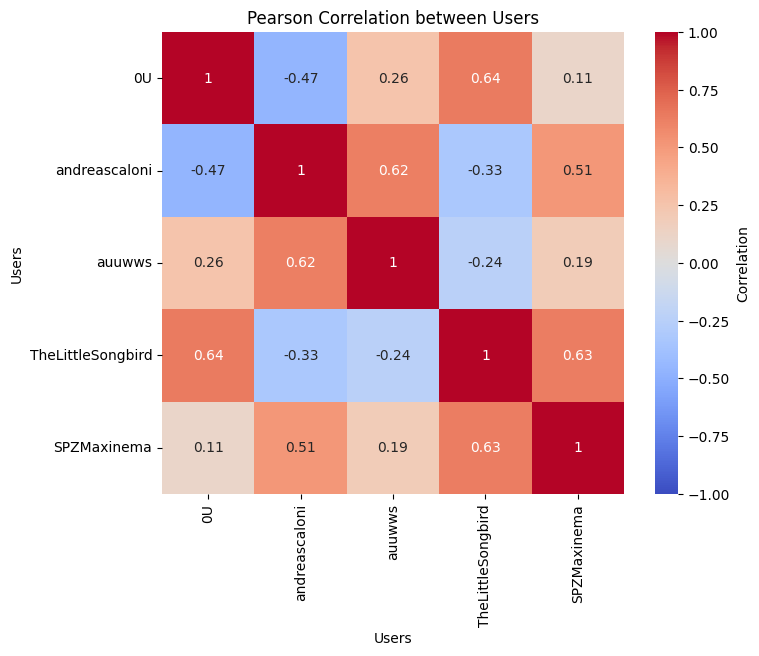

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

# Sample data
data = {
    'Users': ['0U', 'andreascaloni', 'auuwws', 'TheLittleSongbird', 'SPZMaxinema'],
    'Avengers: Infinity War': [10, 8, 10, 9, 9],
    'Iron Man': [10.0, None, None, 9.0, None],
    'Thor: Ragnarok': [10.0, 8.0, 9.0, 10.0, 9.0],
    'The Avengers': [None, 8.0, None, 9.0, 10.0],
    'Guardians of the Galaxy': [None, 9.0, 8.0, None, None]
}

# Load data into DataFrame
df = pd.DataFrame(data)

# Set Users column as index and fill NaN with 0 for calculation purposes
df_filled = df.set_index('Users').fillna(0)

# Cosine similarity
cosine_sim = cosine_similarity(df_filled)
cosine_similarity_df = pd.DataFrame(cosine_sim, index=df_filled.index, columns=df_filled.index)

# Pearson correlation
pearson_sim = pd.DataFrame(index=df_filled.index, columns=df_filled.index)

for user1 in df_filled.index:
    for user2 in df_filled.index:
        if user1 != user2:
            corr, _ = pearsonr(df_filled.loc[user1], df_filled.loc[user2])
            pearson_sim.loc[user1, user2] = corr
        else:
            pearson_sim.loc[user1, user2] = 1  # Self-similarity

# Convert to numeric for plotting
pearson_sim = pearson_sim.astype(float)

# Plot Pearson correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_sim, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True, cbar_kws={'label': 'Correlation'})
plt.title('Pearson Correlation between Users')
plt.show()


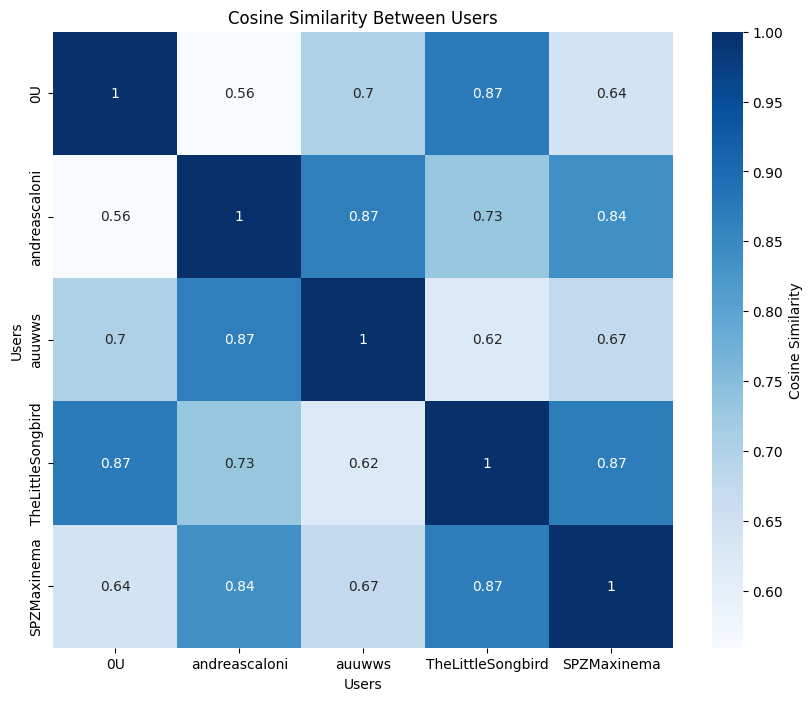

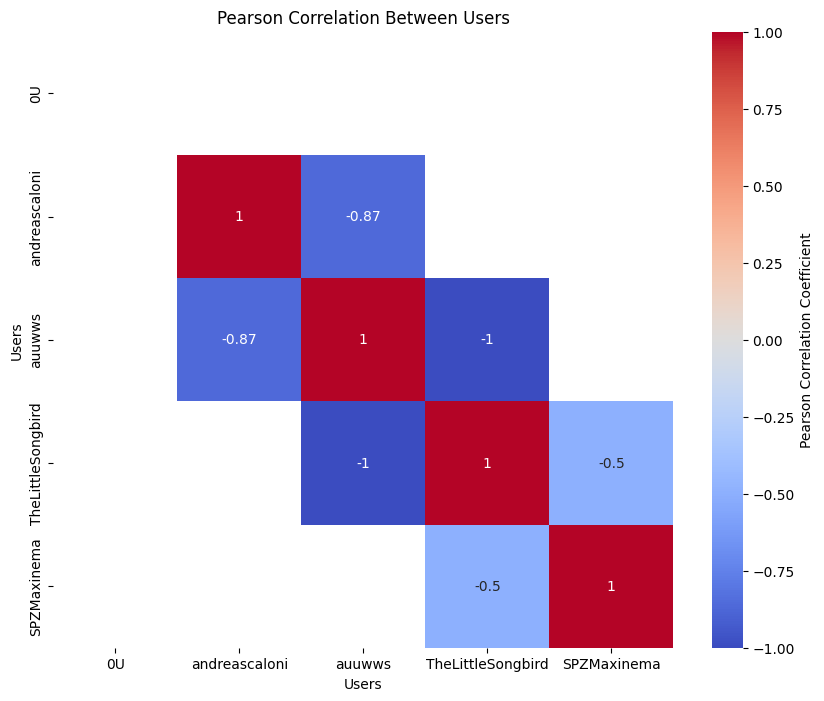

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = {
    'Users': ['0U', 'andreascaloni', 'auuwws', 'TheLittleSongbird', 'SPZMaxinema'],
    'Avengers: Infinity War': [10, 8, 10, 9, 9],
    'Iron Man': [10.0, None, None, 9.0, None],
    'Thor: Ragnarok': [10.0, 8.0, 9.0, 10.0, 9.0],
    'The Avengers': [None, 8.0, None, 9.0, 10.0],
    'Guardians of the Galaxy': [None, 9.0, 8.0, None, None]
}

# Create DataFrame and set 'Users' as the index
df = pd.DataFrame(data).set_index('Users')

# Fill NaN values with 0 for cosine similarity calculation
df_filled = df.fillna(0)

# Calculate Cosine Similarity
cosine_sim = cosine_similarity(df_filled)
cosine_sim_df = pd.DataFrame(cosine_sim, index=df.index, columns=df.index)

# Plot Cosine Similarity Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=True, cmap="Blues", cbar_kws={'label': 'Cosine Similarity'})
plt.title("Cosine Similarity Between Users")
plt.show()

# Calculate Pearson Correlation
pearson_corr = df.transpose().corr()
 
# Plot Pearson Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Pearson Correlation Coefficient'})
plt.title("Pearson Correlation Between Users")
plt.show()


c:\Users\Faris Hassan\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Faris Hassan\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
c:\Users\Faris Hassan\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Faris Hassan\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


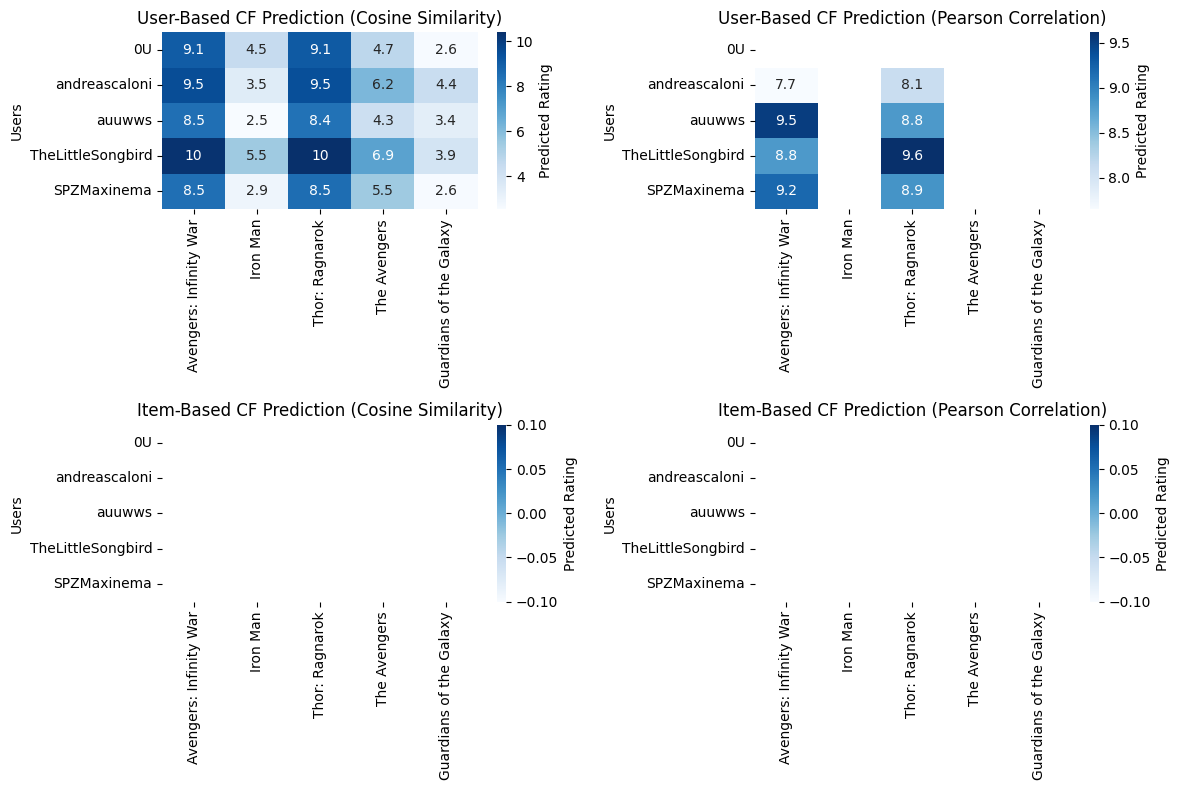

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = {
    'Users': ['0U', 'andreascaloni', 'auuwws', 'TheLittleSongbird', 'SPZMaxinema'],
    'Avengers: Infinity War': [10, 8, 10, 9, 9],
    'Iron Man': [10.0, None, None, 9.0, None],
    'Thor: Ragnarok': [10.0, 8.0, 9.0, 10.0, 9.0],
    'The Avengers': [None, 8.0, None, 9.0, 10.0],
    'Guardians of the Galaxy': [None, 9.0, 8.0, None, None]
}

# Create DataFrame and set 'Users' as the index
df = pd.DataFrame(data).set_index('Users')

# Fill NaN values with 0 for cosine similarity calculation
df_filled = df.fillna(0)

# Cosine Similarity for User-Based and Item-Based CF
user_cosine_sim = cosine_similarity(df_filled)
item_cosine_sim = cosine_similarity(df_filled.transpose())

user_cosine_sim_df = pd.DataFrame(user_cosine_sim, index=df.index, columns=df.index)
item_cosine_sim_df = pd.DataFrame(item_cosine_sim, index=df.columns, columns=df.columns)

# Pearson Correlation for User-Based and Item-Based CF
user_pearson_corr = df.transpose().corr()
item_pearson_corr = df.corr()

# Function for User-Based CF Prediction
def user_based_cf(similarity_matrix, ratings_matrix):
    # Convert the mean Series to a numpy array for reshaping
    user_mean = ratings_matrix.mean(axis=1).to_numpy()
    ratings_diff = (ratings_matrix.T - user_mean).T  # Subtract mean to normalize

    # Reshape user_mean and calculate the prediction
    prediction = user_mean[:, np.newaxis] + similarity_matrix.dot(ratings_diff) / np.array([np.abs(similarity_matrix).sum(axis=1)]).T
    return pd.DataFrame(prediction, index=ratings_matrix.index, columns=ratings_matrix.columns)

# Function for Item-Based CF Prediction
def item_based_cf(similarity_matrix, ratings_matrix):
    item_mean = ratings_matrix.mean(axis=0)
    ratings_diff = ratings_matrix - item_mean  # Subtract mean to normalize
    prediction = item_mean + ratings_diff.dot(similarity_matrix) / np.array([np.abs(similarity_matrix).sum(axis=1)])
    return pd.DataFrame(prediction, index=ratings_matrix.index, columns=ratings_matrix.columns)

# User-Based CF Predictions
user_cf_cosine_prediction = user_based_cf(user_cosine_sim, df_filled)
user_cf_pearson_prediction = user_based_cf(user_pearson_corr.fillna(0), df)

# Item-Based CF Predictions
item_cf_cosine_prediction = item_based_cf(item_cosine_sim, df_filled)
item_cf_pearson_prediction = item_based_cf(item_pearson_corr.fillna(0), df)

# Plotting Predictions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.heatmap(user_cf_cosine_prediction, annot=True, cmap="Blues", cbar_kws={'label': 'Predicted Rating'})
plt.title("User-Based CF Prediction (Cosine Similarity)")

plt.subplot(2, 2, 2)
sns.heatmap(user_cf_pearson_prediction, annot=True, cmap="Blues", cbar_kws={'label': 'Predicted Rating'})
plt.title("User-Based CF Prediction (Pearson Correlation)")

plt.subplot(2, 2, 3)
sns.heatmap(item_cf_cosine_prediction, annot=True, cmap="Blues", cbar_kws={'label': 'Predicted Rating'})
plt.title("Item-Based CF Prediction (Cosine Similarity)")

plt.subplot(2, 2, 4)
sns.heatmap(item_cf_pearson_prediction, annot=True, cmap="Blues", cbar_kws={'label': 'Predicted Rating'})
plt.title("Item-Based CF Prediction (Pearson Correlation)")

plt.tight_layout()
plt.show()

In [7]:
import numpy as np
import pandas as pd

def user_based_cf(similarity_matrix, ratings_matrix):
    # Convert the mean Series to a numpy array for reshaping
    user_mean = ratings_matrix.mean(axis=1).to_numpy()
    ratings_diff = (ratings_matrix.T - user_mean).T  # Subtract mean to normalize

    # Reshape user_mean and calculate the prediction
    prediction = user_mean[:, np.newaxis] + similarity_matrix.dot(ratings_diff) / np.array([np.abs(similarity_matrix).sum(axis=1)]).T
    
    # Convert prediction to DataFrame
    prediction_df = pd.DataFrame(prediction, index=ratings_matrix.index, columns=ratings_matrix.columns)
    
    # Display the result as a table
    print("User-Based Collaborative Filtering Prediction Table:")
    print(prediction_df)
    
    return prediction_df

# Example call (assuming user_cosine_sim and df_filled are defined)
user_cf_cosine_prediction = user_based_cf(user_cosine_sim, df_filled)

User-Based Collaborative Filtering Prediction Table:
                   Avengers: Infinity War  Iron Man  Thor: Ragnarok  \
Users                                                                 
0U                               9.069296  4.497083        9.114873   
andreascaloni                    9.513662  3.455935        9.480089   
auuwws                           8.481725  2.526630        8.383592   
TheLittleSongbird               10.312948  5.454796       10.405484   
SPZMaxinema                      8.491417  2.914070        8.540039   

                   The Avengers  Guardians of the Galaxy  
Users                                                     
0U                     4.733669                 2.585079  
andreascaloni          6.155638                 4.394675  
auuwws                 4.253386                 3.354667  
TheLittleSongbird      6.878922                 3.947850  
SPZMaxinema            5.468015                 2.586459  


In [8]:
import numpy as np
import pandas as pd

def item_based_cf(similarity_matrix, ratings_matrix):
    # Calculate the mean rating for each item
    item_mean = ratings_matrix.mean(axis=0).to_numpy()  # Mean across rows for item-based
    ratings_diff = ratings_matrix - item_mean  # Subtract mean to normalize

    # Calculate the item-based prediction
    prediction = item_mean + ratings_diff.dot(similarity_matrix) / np.array([np.abs(similarity_matrix).sum(axis=1)])
    
    # Convert prediction to DataFrame
    prediction_df = pd.DataFrame(prediction, index=ratings_matrix.index, columns=ratings_matrix.columns)
    
    # Display the result as a table
    print("Item-Based Collaborative Filtering Prediction Table:")
    print(prediction_df)
    
    return prediction_df

# Example call (assuming item_cosine_sim and df_filled are defined)
item_cf_cosine_prediction = item_based_cf(item_cosine_sim, df_filled)

Item-Based Collaborative Filtering Prediction Table:
                   Avengers: Infinity War  Iron Man  Thor: Ragnarok  \
Users                                                                 
0U                                    NaN       NaN             NaN   
andreascaloni                         NaN       NaN             NaN   
auuwws                                NaN       NaN             NaN   
TheLittleSongbird                     NaN       NaN             NaN   
SPZMaxinema                           NaN       NaN             NaN   

                   The Avengers  Guardians of the Galaxy  
Users                                                     
0U                          NaN                      NaN  
andreascaloni               NaN                      NaN  
auuwws                      NaN                      NaN  
TheLittleSongbird           NaN                      NaN  
SPZMaxinema                 NaN                      NaN  


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

def calculate_cosine_similarity(ratings_matrix):
    # Fill NaN values with 0 before calculating similarity
    return cosine_similarity(ratings_matrix.fillna(0))

def calculate_pearson_correlation(ratings_matrix):
    # Use .corr() which inherently handles NaNs by only correlating valid data pairs
    return ratings_matrix.corr(method='pearson')



In [14]:
def user_based_cf(similarity_matrix, ratings_matrix):
    user_mean = ratings_matrix.mean(axis=1).values
    ratings_diff = (ratings_matrix.T - user_mean).T.fillna(0)  # Ensure no NaN values
    prediction = user_mean[:, np.newaxis] + (similarity_matrix.dot(ratings_diff)) / (np.array([np.abs(similarity_matrix).sum(axis=1)]) + 1e-9)  # Avoid division by zero
    return pd.DataFrame(prediction, index=ratings_matrix.index, columns=ratings_matrix.columns)

def item_based_cf(similarity_matrix, ratings_matrix):
    item_mean = ratings_matrix.mean(axis=0).values
    ratings_diff = ratings_matrix.fillna(0) - item_mean  # Fill NaN with 0 for item-based
    prediction = item_mean + (ratings_diff.dot(similarity_matrix)) / (np.array([np.abs(similarity_matrix).sum(axis=1)]) + 1e-9)  # Avoid division by zero
    return pd.DataFrame(prediction, index=ratings_matrix.index, columns=ratings_matrix.columns)


In [15]:
def get_top_n_recommendations(prediction_df, n=5):
    top_n = {}
    for user in prediction_df.index:
        top_n[user] = prediction_df.loc[user].nlargest(n).index.tolist()
    return top_n


In [22]:
import pandas as pd

# Sample user ratings data
data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4],
    'product_id': ['A', 'B', 'C', 'A', 'C', 'B', 'C', 'D', 'A', 'D'],
    'rating': [5, 4, 3, 4, 5, 2, 3, 4, 5, 1]
}

ratings_df = pd.DataFrame(data)


In [23]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import numpy as np

# Pivot the DataFrame to create a user-item matrix
user_item_matrix = ratings_df.pivot(index='user_id', columns='product_id', values='rating').fillna(0)

# Cosine Similarity
cosine_sim = cosine_similarity(user_item_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_item_matrix.index, columns=user_item_matrix.index)

# Pearson Correlation
pearson_sim = 1 - pairwise_distances(user_item_matrix, metric='correlation')
pearson_sim_df = pd.DataFrame(pearson_sim, index=user_item_matrix.index, columns=user_item_matrix.index)

def get_top_n_recommendations(predictions, n=3):
    recommendations = []
    for user in predictions.index:
        user_ratings = predictions.loc[user]
        top_n = user_ratings.nlargest(n).index.tolist()
        recommendations.append((user, top_n))
    return recommendations

def predict_ratings(similarity_matrix, user_item_matrix):
    # Weighted sum of ratings by similar users
    pred_ratings = np.dot(similarity_matrix, user_item_matrix) / np.array([np.abs(similarity_matrix).sum(axis=1)]).T
    return pd.DataFrame(pred_ratings, index=user_item_matrix.index, columns=user_item_matrix.columns)

# User-Based Predictions
cosine_predictions = predict_ratings(cosine_sim, user_item_matrix)
pearson_predictions = predict_ratings(pearson_sim, user_item_matrix)

# Get Top-N Recommendations
top_n_cosine = get_top_n_recommendations(cosine_predictions)
top_n_pearson = get_top_n_recommendations(pearson_predictions)

print("Top-N Recommendations (Cosine Similarity):", top_n_cosine)
print("Top-N Recommendations (Pearson Correlation):", top_n_pearson)

Top-N Recommendations (Cosine Similarity): [(1, ['A', 'C', 'B']), (2, ['A', 'C', 'B']), (3, ['C', 'A', 'D']), (4, ['A', 'C', 'B'])]
Top-N Recommendations (Pearson Correlation): [(1, ['A', 'C', 'B']), (2, ['A', 'C', 'B']), (3, ['D', 'B', 'C']), (4, ['A', 'C', 'B'])]
